<h1 align='center'> INF-280 Estadística Computacional 2023-1 </h1>

<H3 align='center'> Funciones y métodos para el Taller 1 </H3>

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Lectura de Archivo

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1c2HowCraYTESP4O_llI9JP46iAUCP1LN")
df

,index,edad,genero,region,zona,cambio_climatico,pensiones,deportes_tipicos,voto
0,0,21,Masculino,Los rios,Urbana,Alta,Estatal,Eliminarse,1
1,1,61,Masculino,Maule,Urbana,Media,Estatal,Eliminarse,1
2,2,22,No Binario,Metropolitana,Urbana,Muy Alta,Estatal,Eliminarse,1
3,3,21,Masculino,Aysen,Urbana,Muy Alta,Estatal,Eliminarse,1
4,4,43,Masculino,O'Higgins,Urbana,Ninguna,Mixto,Mantenerse,2
...,...,...,...,...,...,...,...,...,...
1595,1595,27,Femenino,Metropolitana,Urbana,Alta,Mixto,Modificarse,1
1596,1596,62,Femenino,Los Lagos,Rural,Media,Mixto,Modificarse,2
1597,1597,60,Femenino,Los rios,Urbana,Alta,Mixto,Mantenerse,2
1598,1598,25,Femenino,Aysen,Urbana,Muy Alta,Estatal,Modificarse,1


### Obtener información con pandas

####1) Tamaño del dataset

In [164]:
df.shape #filas, columnas

(1600, 9)

####2) Nombres de columnas

In [165]:
df.columns

Index(['index', 'edad', 'genero', 'region', 'zona', 'cambio_climatico',
       'pensiones', 'deportes_tipicos', 'voto'],
      dtype='object')

####3) Valores únicos en una columna

In [166]:
df['genero'].unique()

array(['Masculino', 'No Binario', 'Femenino'], dtype=object)

In [167]:
df['genero'].value_counts()

Femenino      745
Masculino     703
No Binario    152
Name: genero, dtype: int64

####4) Mínimo, máximo, media, mediana, cuartiles

In [168]:
df['edad'].min()

18

In [169]:
df['edad'].max()

80

In [170]:
df['edad'].mean()

38.1525

In [171]:
df['edad'].median()

35.0

In [172]:
df['edad'].quantile(q = 0.25)

25.0

In [173]:
df['edad'].describe() #Solo funciona para columnas con valores numericos

count    1600.000000
mean       38.152500
std        15.370813
min        18.000000
25%        25.000000
50%        35.000000
75%        49.000000
max        80.000000
Name: edad, dtype: float64

In [174]:
datos = df['edad'].describe()
datos['max']

80.0

####5) Filtrar datos

El método ``.loc`` selecciona las filas que cumplan con alguna condición lógica.

In [175]:
#Una sola condicion
df_tercera_edad = df.loc[df['edad'] >= 65]
df_tercera_edad

,index,edad,genero,region,zona,cambio_climatico,pensiones,deportes_tipicos,voto
41,41,76,Masculino,Metropolitana,Urbana,Baja,Estatal,Mantenerse,1
50,50,65,Masculino,Antofagasta,Urbana,Ninguna,Mixto,Mantenerse,2
53,53,68,Masculino,Maule,Urbana,Media,Mixto,Mantenerse,2
58,58,76,Femenino,Araucania,Rural,Media,Mixto,Modificarse,2
66,66,78,Femenino,Atacama,Urbana,Ninguna,Mixto,Modificarse,2
...,...,...,...,...,...,...,...,...,...
1473,1473,66,Masculino,Los Lagos,Urbana,Ninguna,Mixto,Mantenerse,2
1481,1481,80,Masculino,Arica,Rural,Media,Mixto,Mantenerse,2
1532,1532,65,Masculino,Coquimbo,Urbana,Media,AFP,Mantenerse,2
1553,1553,75,Masculino,Antofagasta,Urbana,Media,Mixto,Mantenerse,2


In [176]:
#Dos condiciones (AND)
df_tercera_edad_hombres = df.loc[ (df['edad'] >= 65) & (df['genero'] == 'Masculino')]
df_tercera_edad_hombres

,index,edad,genero,region,zona,cambio_climatico,pensiones,deportes_tipicos,voto
41,41,76,Masculino,Metropolitana,Urbana,Baja,Estatal,Mantenerse,1
50,50,65,Masculino,Antofagasta,Urbana,Ninguna,Mixto,Mantenerse,2
53,53,68,Masculino,Maule,Urbana,Media,Mixto,Mantenerse,2
84,84,68,Masculino,Los Lagos,Urbana,Ninguna,Mixto,Mantenerse,2
90,90,68,Masculino,Maule,Urbana,Media,Estatal,Modificarse,1
123,123,75,Masculino,Coquimbo,Urbana,Baja,Mixto,Mantenerse,2
137,137,65,Masculino,Araucania,Rural,Media,Mixto,Mantenerse,2
143,143,77,Masculino,Coquimbo,Urbana,Muy Alta,Mixto,Mantenerse,1
156,156,80,Masculino,Arica,Urbana,Media,Mixto,Mantenerse,2
167,167,76,Masculino,Ñuble,Urbana,Media,Mixto,Mantenerse,2


In [177]:
#Una u otra condicion (OR)
df_tercera_edad_hombres = df.loc[ (df['region'] == 'Atacama') | (df['region'] == 'Los Lagos')]
df_tercera_edad_hombres

,index,edad,genero,region,zona,cambio_climatico,pensiones,deportes_tipicos,voto
7,7,25,Masculino,Atacama,Urbana,Alta,AFP,Mantenerse,2
44,44,49,Masculino,Atacama,Urbana,Media,Mixto,Modificarse,2
65,65,45,Masculino,Los Lagos,Rural,Ninguna,AFP,Mantenerse,2
66,66,78,Femenino,Atacama,Urbana,Ninguna,Mixto,Modificarse,2
77,77,37,No Binario,Los Lagos,Urbana,Alta,Mixto,Eliminarse,1
...,...,...,...,...,...,...,...,...,...
1563,1563,27,Femenino,Los Lagos,Urbana,Muy Alta,AFP,Mantenerse,2
1572,1572,26,No Binario,Atacama,Urbana,Alta,Estatal,Modificarse,1
1576,1576,39,Masculino,Los Lagos,Urbana,Baja,Mixto,Mantenerse,2
1580,1580,21,Femenino,Atacama,Urbana,Muy Alta,AFP,Eliminarse,2


**Observación:**

* Para evaluar 2 o más condiciones, cada condición deber ir entre parentesis ().
* Las condiciones **si distinguen mayúsculas** en los nombres de columnas y valores filtrados. Es decir, no es lo mismo escribir 'Edad' y 'edad' al acceder a una columna, tampoco es lo mismo escribir 'Masculino' y 'masculino' al querer acceder solo a dicho género.
* Para recordar los nombres de columnas podría resultar útil crear un nuevo bloque de código y ejecutar ``df.columns``
* Para recordar los posibles valores que puede tomar una columa podría ser útil crear un nuevo bloque de código y ejecutar ``df['ColumnaDeInteres].unique()``

####6) Crear sub-dataframe con algunas columnas

In [178]:
#Crear nuevo dataframe solo con las columnas 'edad' y 'genero'
df_nuevo = df[['edad', 'genero']]
df_nuevo

,edad,genero
0,21,Masculino
1,61,Masculino
2,22,No Binario
3,21,Masculino
4,43,Masculino
...,...,...
1595,27,Femenino
1596,62,Femenino
1597,60,Femenino
1598,25,Femenino


In [179]:
#Crear nuevo dataframe con los registros que cumplan alguna condición y solo con las columnas 'edad' y 'genero'
df_nuevo2 = df.loc[ df['edad'] >= 65 , ['edad', 'genero']]
df_nuevo2

,edad,genero
41,76,Masculino
50,65,Masculino
53,68,Masculino
58,76,Femenino
66,78,Femenino
...,...,...
1473,66,Masculino
1481,80,Masculino
1532,65,Masculino
1553,75,Masculino


### Gráficos

En general, se utiliza la librería **pandas** para filtrar datos y la libería **matplotlib** para graficarlos. Además, existe la librería **seaborn**, la cual se utiliza para crear gráficos estadísticos atractivos y fáciles de interpretar.

Se recomienda que investiguen sobre cómo graficar utilizando **seaborn**, ya que les podría resultar mucho más simple. Algunas funciones de interés podrían ser:

* seaborn.countplot()
* seaborn.boxplot()
* seaborn.histplot()


#### Barras

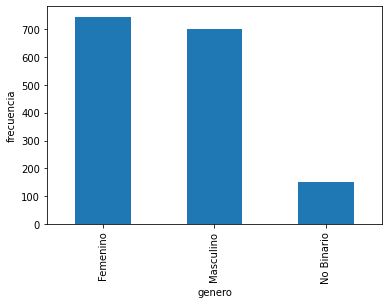

In [180]:
#Grafico de frecuencias de cada genero

#Se obtienen las frecuencias de cada genero
frecuencias = df['genero'].value_counts()

#Se realiza un grafico (plot) de tipo barras (kind = 'bar')
frecuencias.plot(kind = 'bar')

#nombres de los ejes
plt.xlabel('genero')
plt.ylabel('frecuencia')
plt.show()

#### Histograma

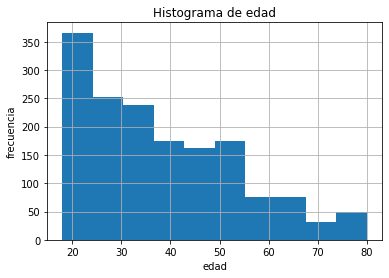

In [181]:
df['edad'].hist(bins = 10)  #se puede cambiar la cantidad de barras pasando el parametro bins

plt.title('Histograma de edad')
plt.xlabel('edad')
plt.ylabel('frecuencia')

plt.show()

#### Boxplot

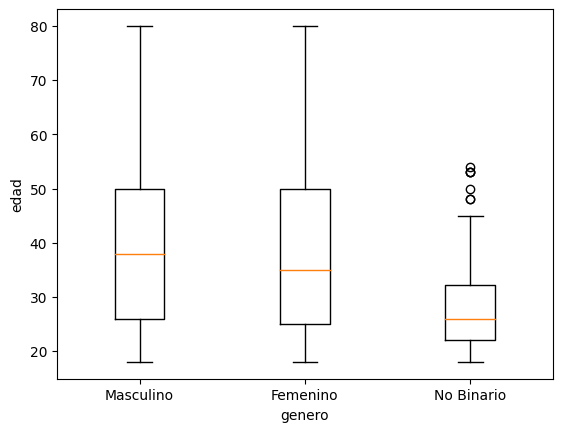

In [3]:
masculino  = df.loc[df['genero'] == 'Masculino']['edad']
femenino   = df.loc[df['genero'] == 'Femenino']['edad']
no_binario = df.loc[df['genero'] == 'No Binario']['edad']

plt.boxplot([masculino, femenino, no_binario])

plt.xlabel('genero')
plt.ylabel('edad')
plt.xticks([1, 2, 3], ['Masculino', 'Femenino', 'No Binario'])
plt.show()